In [28]:
%matplotlib notebook

In [58]:
# Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
from scipy.stats import sem, linregress

In [108]:
csv_path = ("../input csv/booklist_ratings.csv")
book_list = pd.read_csv(csv_path, encoding="utf-8")
#book_list = book_list.reset_index(drop = True)
#book_list.drop(columns = ['Unnamed: 0'])
book_list = book_list.iloc[:, 1:4]
book_list.head()

books  rating  average_votes
0  Around the World in Eighty Days (Extraordinary...    3.92         156095
1                     Invasion of the Body Snatchers    3.89          17372
2                                       Frankenstein    3.77         992097
3                                      Invisible Man    3.85         139953
4  Journey to the Center of the Earth (Extraordin...    3.85         126361

In [109]:
csv_path = ("../Transformed_data/CombinedDF.csv")
movie_list = pd.read_csv(csv_path, encoding="utf-8")
book_list = book_list.iloc[:, 1:4]
movie_list.head()

Unnamed: 0                               Title  Movie Rating  \
0           0     around the world in eighty days           7.8   
1           1                      body snatchers           5.9   
2           2                        frankenstein           7.9   
3           3                   the invisible man           7.7   
4           4  journey to the center of the earth           5.8   

   Movie Revenue  Book Rating  Average Votes  
0            NaN          NaN            NaN  
1            NaN          NaN            NaN  
2            NaN         3.77       992097.0  
3            NaN          NaN            NaN  
4            NaN          NaN            NaN

In [61]:
all_list = pd.concat([book_list, movie_list], axis = 1)
#all_list = all_list.reset_index(drop=True)
all_list

book_rating movie  movie_rating
0          3.7   hjg           1.6
1          4.5   rty           3.1
2          2.4   hfn           4.2
3          1.9  nvbn           3.5
4          5.0   rty           2.9

In [62]:
#all_list.plot(kind="scatter", x="book_rating", y="movie_rating", grid=True, figsize=(5, 5),
            #  title="Book Vs. Movie")
#plt.tight_layout()
#plt.savefig("../Images/Books vs Movies.png")
#plt.xlabel("Books")
#plt.ylabel("Movies")
#plt.show()

<IPython.core.display.Javascript object>


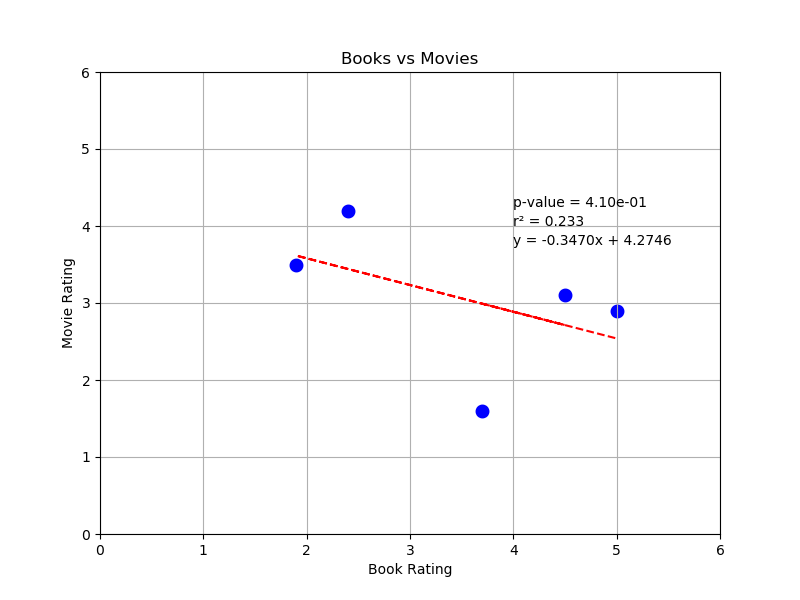

In [107]:
#year_labels = [str(all_list['movie_rating'][i]) for i in np.arange(all_list.shape[0])]
plt.scatter(all_list['book_rating'], all_list['movie_rating'], marker='o', linewidth=4, 
            linestyle='solid', color='blue', alpha=1,label=year_labels)
# Adding a trendline
x=all_list['book_rating']
y=all_list['movie_rating']
slope, _, r_value, p_value, _ = linregress(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
plt.text(4, 3.75, f"y = {z[0]:.4f}x + {z[1]:.4f}")
plt.text(4, 4, f"r\N{SUPERSCRIPT TWO} = {r_value**2:.3f}")
plt.text(4, 4.25, f"p-value = {p_value:.2e}")
plt.title('Books vs Movies')
plt.xlabel('Book Rating')
plt.axis(xmin=0, xmax=6)
plt.axis(ymin=0, ymax=6)
plt.ylabel('Movie Rating')
plt.grid()
plt.gcf().set_size_inches(8, 6)
plt.rcParams.update({'font.size': 10})
#plt.savefig("../6_Output/Average_USA_water_access_per_year_NP.png", bbox_inches='tight')
plt.show()